In [2]:
import networkx as nx
import matplotlib.pyplot as plt

i = 4
j = 7

In [3]:
with open('dblpData.txt') as f:
    edges_pair = f.readlines()

In [4]:
print(edges_pair[:10])

['0 1385743\n', '0 1385744\n', '0 3065596\n', '0 1602847\n', '0 3235202\n', '0 3392066\n', '0 1543646\n', '0 3515618\n', '0 3113972\n', '0 3691721\n']


In [5]:
edges = []

for edge in edges_pair:
    if edge == '\n':
        continue
    edge = edge.strip(" ()\n").replace("'" , "").split(',')
    edge = edge[0].split()
    # print(edge)
    edges.append((int(edge[0]) , int(edge[1])))


In [6]:
print(edges[:10])

[(0, 1385743), (0, 1385744), (0, 3065596), (0, 1602847), (0, 3235202), (0, 3392066), (0, 1543646), (0, 3515618), (0, 3113972), (0, 3691721)]


In [7]:
tm = 0
od_temp = {}
for edge in edges:
    if edge[0] not in od_temp:
        od_temp[edge[0]] = 0
    od_temp[edge[0]] += 1
    tm = max(tm , od_temp[edge[0]])

print(tm)

50244


In [8]:
# edges_temp = []
# print(len(edges))
# for edge in edges:
#     if od_temp[edge[0]] <= 60:
#         edges_temp.append(edge)

# print(len(edges_temp))
# edges = edges_temp

In [9]:
temp_indeg = {}
for edge in edges:
    if edge[1] not in temp_indeg:
        temp_indeg[edge[1]] = 0

    temp_indeg[edge[1]] +=1

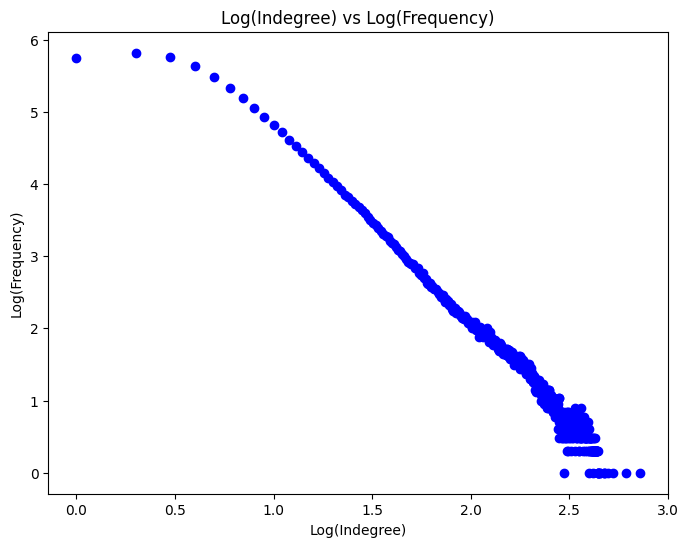

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming temp_indeg is a dictionary with destination nodes as keys and their corresponding indegrees as values

# Calculate frequency of each indegree
indeg_freq = {}
for st in temp_indeg.values():
    if st not in indeg_freq:
        indeg_freq[st] = 0
    indeg_freq[st] += 1

# Separate indegrees and frequencies
indegree = list(indeg_freq.keys())
freq = list(indeg_freq.values())

# Calculate logarithm of indegrees and frequencies
log_indegree = np.log10(indegree)
log_frequency = np.log10(freq)

# Plot log(indegree) vs log(frequency)
plt.figure(figsize=(8, 6))
plt.scatter(log_indegree, log_frequency, color='blue')
plt.title('Log(Indegree) vs Log(Frequency)')
plt.xlabel('Log(Indegree)')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()


In [9]:
edges_temp = []
print(len(edges))
for edge in edges:
    if temp_indeg[edge[1]] <= 60:
        edges_temp.append(edge)

print(len(edges_temp))
edges = edges_temp

13224047
13212006


In [10]:
class GraphWithVisualization():
    def __init__(self):
        self.visual = []
    
    def addEdge(self , a , b):
        temp = [a , b]
        self.visual.append(temp)

    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()


        
        


In [11]:
G = GraphWithVisualization()
for it in range(20):
    G.addEdge(edges[it][0] , edges[it][1])
# G.visualize()
# G = nx.Graph()
# G.add_edges_from(edges[100:])
# nx.draw_networkx(G)
# plt.show()


In [12]:
import graphviz
dot =  graphviz.Digraph()

for node in G.visual:
    dot.node(str(node[0]))
    dot.node(str(node[1]))
    dot.edge(str(node[0]) , str(node[1]))

# dot.render('graph.pdf' , view=True)


In [13]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def potential_fan_pages(self):
        fan_pages = []
        for node in self.graph:
            if len(self.graph[node]) >= 6:
                fan_pages.append(node)
        return fan_pages

# Function to read edges from input and construct the graph
def construct_graph(edges):
    g = Graph()
    for u, v in edges:
        g.add_edge(u, v)
    return g




In [14]:
# Construct the graph
# g = construct_graph(edges)

# # Find potential fan pages
# fan_pages = g.potential_fan_pages()

# # Display potential fan pages
# print(len(fan_pages))

In [15]:
print(len(edges))
out = 1e4

remove = []
forward = True
counts ={}
threshold_ = 20

while out > threshold_:
    remove = []
    out = 0
    if forward:
        edges = sorted(edges , key=lambda x: x[0])
    else:
        edges = sorted(edges , key=lambda x : x[1])

    counts = {}
    for edge in edges:
        if forward:
            first_element = edge[0]
        else:
            first_element = edge[1]
        
        if first_element not in counts:
            counts[first_element] = 0
        
        counts[first_element] += 1
    counts_list  = list(counts.items())
    sorted_counts = sorted(counts_list , key=lambda x:x[1] )
    if forward:
        filtered_tuples = [t for t in edges  if counts[t[0]] >= j]
    else:
        filtered_tuples = [t for t in edges if counts[t[1]] >= i]
    out = len(edges) - len(filtered_tuples)
    edges = filtered_tuples
    forward = not forward

print(len(edges))










13212006
4113515


In [16]:
tm = 0
fans_outdegree = {}
for edge in edges:
    if edge[0] not in fans_outdegree:
        fans_outdegree[edge[0]] = 0
    fans_outdegree[edge[0]] += 1
    tm = max(tm , fans_outdegree[edge[0]])

print(tm)

60


In [17]:
def build_index(graph, threshold):
    index = {}  # Initialize index
    print(threshold)

    # Iterate through edges in the graph
    for edge in graph:
        fan = edge[0]
        center = edge[1]

        # Check if the fan's out-degree matches the threshold (j)
        if fans_outdegree[fan] == threshold:
            # Add the fan to the index under the corresponding center
            if center not in index:
                index[center] = set()
            index[center].add(fan)

    return index

# Pseudo code:
# Initialize an empty index dictionary
# Iterate through edges in the graph
#   Check if the out-degree of the fan matches the threshold
#       Add the fan to the index under the corresponding center
# Return the index


In [18]:
small_index = build_index(edges , j) # fans outdegree matches j

7


In [19]:
print(len(small_index))

192448


In [20]:
set_all = set()

for edge in edges:
    set_all.add(edge[0])

In [21]:
# inclusion-exclusion pruninng

def inclusion_exclusion_pruning(graph, small_index):
    # Initialize sets for each fan
    sets = {} #S(x)

        
        
    

    # Sort edges by destination
    sorted_edges = sorted(graph, key=lambda x: x[1])

    # Iterate through edges
    for edge in sorted_edges:
        y = edge[1]
        if y in small_index:
            # For each degree j fan x adjacent to y
            for fan in small_index[y]:
                if fan not in sets:
                    sets[fan] = set()
                    for dd in small_index[y]:
                        sets[fan].add(dd)
                # Intersect the set of fans adjacent to y with the set corresponding to x
                sets[fan].intersection_update(small_index[y]) #!small_index[y] is N(y) and sets[fan] is S(x)

    return sets



# Pseudo code:
# Initialize sets corresponding to each fan
# Sort edges by destination
# Iterate through sorted edges
#   Check if destination is in the small index
#   If yes, iterate through adjacent fans with the desired degree
#       Intersect the set of fans adjacent to y with the set corresponding to x
# Return sets


In [22]:
edge_list_fan = {}

for source , dest in edges:
    if source not in edge_list_fan:
        edge_list_fan[source] = set()
    edge_list_fan[source].add(dest)

In [23]:
print(len(edges) , len(small_index))

4113515 192448


In [24]:
# run inc-exc pruning

sets_done = inclusion_exclusion_pruning(edges , small_index)
  


In [25]:
print(len(sets_done))

35092


In [26]:
print(i , j)

4 7


In [27]:
cores = []
fans_to_remove= []

print(type(sets_done))
for fan , fan_set in sets_done.items():
    if(len(fan_set) >= i):
        cores.append(list(fan_set))
        
        # core found 
        # prune 
        pass
    #prune fan
    fans_to_remove.append(fan)


<class 'dict'>


In [28]:
print(len(cores))

1656


In [29]:
def find_intersection(source_nodes , edge_list_ll):
    intersc = set(edge_list_ll[source_nodes[0]])
    for node in source_nodes:
        intersc.intersection_update(edge_list_ll[node])
    
    return intersc

In [30]:
cores_full = []
for temp in cores:
    tt = find_intersection(temp , edge_list_fan)
    cores_full.append((temp , list(tt)))


In [31]:
print(len(cores_full))

1656


In [32]:
fans_to_remove_set  = set(fans_to_remove)

In [33]:
print(len(fans_to_remove_set))

35092


In [34]:
print(len(edges))
new_edges = []

for edge in edges:
    if edge[0] in fans_to_remove_set:
        continue
    else:
        new_edges.append(edge)


4113515


In [35]:
# file_path = 'mid.txt'
# with open(file_path, 'w') as file:
#     for edge in edges:
#         file.write(f"{edge[0]} {edge[1]}\n")

In [36]:
print(len(new_edges))
edges = new_edges.copy()
print(len(edges))



3867871
3867871


In [37]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
# i = 6
# j = 6
# new_edges = []
# file_path = 'mid.txt'
# with open(file_path, 'r') as file:
#     for line in file:
#         # Splitting each line into source and destination and converting them to integers
#         source, destination = map(int, line.strip().split())
#         # Adding the edge to the list
#         new_edges.append((source, destination))

In [39]:
print(new_edges[0])

(19, 23)


In [40]:
centers_indegree = {}
dt = 0
for edge in new_edges:
    if edge[1] not in centers_indegree:
        centers_indegree[edge[1]] = 0

    centers_indegree[edge[1]] +=1
    dt = max(dt , centers_indegree[edge[1]])

In [41]:
print(len(centers_indegree))
print(dt)

522141
59


In [42]:
def build_index_centers(graph , threshold):
    print(threshold)
    index_center = {}

    for edge in graph:
        fan = edge[0]
        center = edge[1]

        if centers_indegree[center] == threshold:
            if fan not in index_center:
                index_center[fan] = set()
            index_center[fan].add(center)

    return index_center

In [43]:

print(len(new_edges))

3867871


In [44]:
small_index_center = build_index_centers(new_edges , i)

4


In [45]:
ddd = 0
for s in small_index_center.values():
    ddd = max(ddd , len(s))
print(ddd)

24


In [46]:
print(len(small_index_center))

158840


In [47]:
set_all_center = set()

for edge in new_edges:
    set_all_center.add(edge[1])

In [48]:
def inclusion_exclusion_pruning_center(graph , small_index_center):
    sets_center  = {}

    sorted_edges_cn = sorted(graph , key = lambda x : x[0])
    print('here')

    for edge in sorted_edges_cn:
        y = edge[0]
        if y in small_index_center:
            for cn in small_index_center[y]:
                if cn not in sets_center:
                    sets_center[cn] = set()
                    for ddd in small_index_center[y]:
                        sets_center[cn].add(ddd)
                sets_center[cn].intersection_update(small_index_center[y])
    return sets_center
                

            


In [49]:
print(len(new_edges))
print(len(small_index_center))

3867871
158840


In [50]:
edge_list_source = {}

for source , dest in new_edges:
    if dest not in edge_list_source:
        edge_list_source[dest] = set()
    edge_list_source[dest].add(source)

In [51]:
mm  = 0
for dd in small_index_center.values():
    mm = max(mm , len(dd))
print(mm)

24


In [52]:
st_dd = inclusion_exclusion_pruning_center(new_edges , small_index_center)

here


In [53]:
print(i , j)

4 7


In [54]:
print(len(st_dd))

129947


In [55]:
cores = []
center_to_remove = []

for center , center_set in st_dd.items():
    if(len(center_set) >= j):
        cores.append(list(center_set))
    center_to_remove.append(center)

In [56]:
print(len(cores))

9887


In [57]:
def find_intersection_center(source_nodes , edgeList):
    inters = set(edgeList[source_nodes[0]])
    for node in source_nodes:
        inters.intersection_update(edgeList[node])
    return inters

In [58]:
cores_news = []

for temp in cores:
    ttd = find_intersection_center(temp , edge_list_source)
    cores_news.append((list(ttd) , (temp)))

In [59]:
print((cores_news)[0])

([1930, 1931, 399206, 262815], [399207, 399208, 399209, 399210, 399211, 399212, 399213, 399214])


In [60]:
print(cores_full[0])

([93083, 93084, 93085, 93086], [93088, 93089, 93090, 93091, 93092, 93093, 93087])


In [61]:
print(len(cores_news))
print(len(cores_full))
print(len(cores_full) + len(cores_news))

9887
1656
11543


In [62]:
print(i , j)

4 7


In [63]:
with open('op4.txt' , 'w') as f:
    f.write(f'cores_news : {cores_news} | cores_full : {cores_full}')

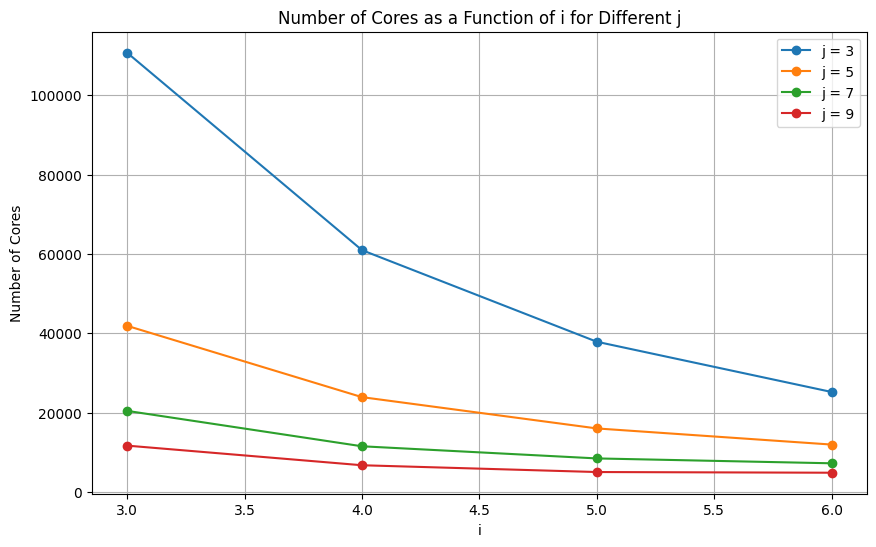

In [11]:
import matplotlib.pyplot as plt

# Given data
data = {(3 , 3) : 110740 , 


(3 , 5) : 41902 , 

(3 , 7) : 20465 , 

(4 , 3) : 60982 , 

(4 , 5) : 23930 , 

(4 , 7) : 11543 , 

(5  , 3) : 37890 , 

(5, 5) : 
 16042 , 

(5, 7) : 
 8482 , 

(5, 9) : 
 5052 , 

(6, 3) : 
 25225 , 

(6, 5) : 
 11973 , 

(6, 7) : 
 7254 , 

(6, 9) : 
 4878   , 
 (3 , 9) : 11708 , 
 (4, 9) : 6762
 }


# Extract j values
j_values = sorted(set(key[1] for key in data.keys()))

# Plot each j with its corresponding number of cores
plt.figure(figsize=(10, 6))
for j in j_values:
    cores = [data.get((i, j), 0) for i in range(min(data.keys())[0], max(data.keys())[0] + 1)]
    plt.plot(range(min(data.keys())[0], max(data.keys())[0] + 1), cores, marker='o', label=f'j = {j}')

plt.xlabel('i')
plt.ylabel('Number of Cores')
plt.title('Number of Cores as a Function of i for Different j')
plt.legend()
plt.grid(True)
plt.show()
